In [ ]:
#Data Set Used :Predicting Heart Disease 
#Kaggle Url
#https://www.kaggle.com/competitions/playground-series-s6e2/data

#this noteBook Need The fallowing librarys,
#pip install numpy pandas scikit-learn xgboost matplotlib seaborn

#for conda 
#conda install numpy pandas scikit-learn matplotlib seaborn
#conda install -c conda-forge xgboost 

In [44]:
import numpy as np
import pandas as pd
import sklearn
import xgboost
import matplotlib
import seaborn

print("Library Versions:")
print("-"*24)
print(f"NumPy:        {np.__version__}")
print(f"Pandas:       {pd.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"XGBoost:      {xgboost.__version__}")
print(f"Matplotlib:   {matplotlib.__version__}")
print(f"Seaborn:      {seaborn.__version__}")

Library Versions:
------------------------
NumPy:        1.23.5
Pandas:       2.3.3
Scikit-learn: 1.7.2
XGBoost:      3.2.0
Matplotlib:   3.10.8
Seaborn:      0.13.2


In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
#Add Your Own Path
train_ds_path = r'Your_Train_Set_Path' #train Set Path
test_ds_path = r'Your_test_Set_Path' #Test Set Path

In [3]:
import pandas as pd
train_df = pd.read_csv(train_ds_path)
test_df = pd.read_csv(test_ds_path)
Target = "Heart Disease"
train_df[Target] = train_df[Target].map({"Presence": 1,'Absence': 0 }).astype("int32") #map Target to 0,1 int32 value,

In [4]:
#Row training DataSet
train_df.head(5)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


In [5]:
import numpy as np
#Adding New Features
#Using it shows No increase in Model Preformance
#I may have got it wrong,you can Run it your self and check,change.
#for this note Book i didn't Run This Cell
def create_features(df):
    df['Cardiac_Workload'] = df['Max HR'] * df['Age']
    df['Stress_Factor'] = df['ST depression'] * df['Slope of ST']
    df['Chol_Age_Ratio'] = df['Cholesterol'] / df['Age']

    df['HighBP'] = (df['BP'] > 130).astype(int)
    df['HighCholesterol'] = (df['Cholesterol'] > 240).astype(int)
    df['totalRiskFactors'] = df['HighBP'] + df['HighCholesterol'] + df['FBS over 120']
    int_cols = df.select_dtypes(include='int64').columns
    float_cols = df.select_dtypes(include='float64').columns
    df[int_cols] = df[int_cols].astype('int32')
    df[float_cols] = df[float_cols].astype('float32')

    return df

train_df = create_features(train_df)
test_df  = create_features(test_df)

In [ ]:
#After Adding New Features
train_df.head(5)

In [7]:

train_df.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,...,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Cardiac_Workload,Stress_Factor,Chol_Age_Ratio,HighBP,HighCholesterol,totalRiskFactors
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,...,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,...,1.455871,0.451040,4.618873,0.448340,8257.604024,1.269057,4.638563,0.395027,0.520800,0.995814
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,...,0.545192,0.798549,1.950007,0.497324,1568.843250,1.882552,0.993950,0.488857,0.499568,0.749606
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,...,1.000000,0.000000,3.000000,0.000000,2485.000000,0.000000,1.960526,0.000000,0.000000,0.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,...,1.000000,0.000000,3.000000,0.000000,7125.000000,0.000000,3.925373,0.000000,0.000000,0.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,...,1.000000,0.000000,3.000000,0.000000,8262.000000,0.100000,4.500000,0.000000,1.000000,1.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,...,2.000000,1.000000,7.000000,1.000000,9360.000000,2.200000,5.215686,1.000000,1.000000,1.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,...,3.000000,3.000000,7.000000,1.000000,14784.000000,18.600000,14.461538,1.000000,1.000000,3.000000


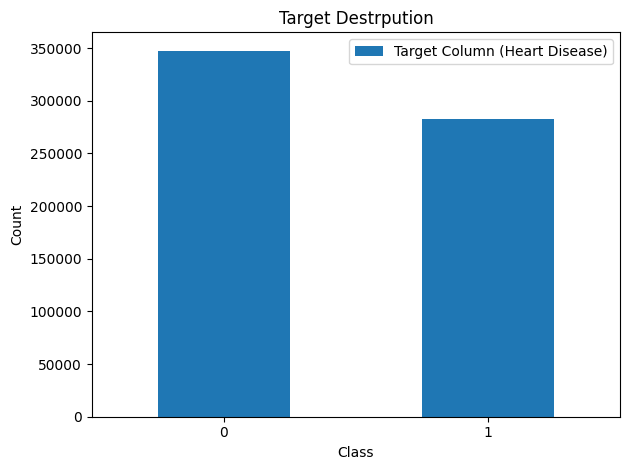

Absence (0): 347546
Presence (1): 282454


In [8]:
from matplotlib import pyplot as plt
#Plot the Target Column
target_column = train_df[Target]
y_plot = target_column.value_counts().sort_index()
counts = pd.DataFrame({f"Target Column ({Target})": y_plot}).astype(int)

ax = counts.plot(kind="bar")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Target Destrpution")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print(f"Absence (0): {y_plot.get(0, 0)}")
print(f"Presence (1): {y_plot.get(1, 0)}")

In [9]:
#Drop Id Column.
train_df = train_df.drop(columns=['id'])
#copy id for test set,usefull for the Kaggle Submission 
test_ids = test_df["id"].copy()
test_df = test_df.drop(columns=['id'])
#Check The Info Of eatch Column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int32  
 1   Sex                      630000 non-null  int32  
 2   Chest pain type          630000 non-null  int32  
 3   BP                       630000 non-null  int32  
 4   Cholesterol              630000 non-null  int32  
 5   FBS over 120             630000 non-null  int32  
 6   EKG results              630000 non-null  int32  
 7   Max HR                   630000 non-null  int32  
 8   Exercise angina          630000 non-null  int32  
 9   ST depression            630000 non-null  float32
 10  Slope of ST              630000 non-null  int32  
 11  Number of vessels fluro  630000 non-null  int32  
 12  Thallium                 630000 non-null  int32  
 13  Heart Disease            630000 non-null  int32  
 14  Card

In [10]:
#for x Drop The Target Column
x = train_df.drop(columns=[Target])
#y is the target Column,
y = train_df[Target]

In [11]:
from sklearn.model_selection import StratifiedKFold
# after 10 folds the model (AUC) Will Start To drop Down
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=8)

In [12]:
import numpy as np
oof_preds = np.zeros(len(x))
test_preds = np.zeros(len(test_df))
cv_scores = []

In [40]:
from xgboost import XGBClassifier
import time

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
    average_precision_score, RocCurveDisplay,roc_auc_score,average_precision_score, roc_curve
start = time.time()
for f, (train_idx, val_idx) in enumerate(cv.split(x, y), start=1):
    fold_start = time.time()
    X_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    #For the Wieght 
    spw = (y_train == 0).sum() / (y_train == 1).sum()
    
    
    #XGBClassifier Model,
    #Choice By RandomizedSearchCV 
    #Code can be found in the github repositorie ()
    model = XGBClassifier(
                max_depth=3,
                n_estimators=1200,
                learning_rate=0.1,
                subsample=0.9,
                colsample_bytree=0.7,
                gamma=0.1,
                min_child_weight=4,
                reg_lambda=2.0,
                reg_alpha=0,
                scale_pos_weight=spw,
                random_state=42,
                n_jobs=-1,
                tree_method="hist",
                eval_metric="auc",
            )
    #Train The Model
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    #predict on the validation set
    predict_ = model.predict(X_val)
    proba_val = model.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = proba_val
    test_preds += model.predict_proba(test_df)[:, 1]
    
    score = roc_auc_score(y_val, proba_val)
    cv_scores.append(score)
    fold_time = time.time() - fold_start
    total_time = time.time() - start
    print(f"Fold {f} AUC: {score:.5f} | Time: {total_time:.2f}s")

Fold 1 AUC: 0.95499 | Time: 20.14s
Fold 2 AUC: 0.95597 | Time: 39.69s
Fold 3 AUC: 0.95562 | Time: 59.25s
Fold 4 AUC: 0.95754 | Time: 79.67s
Fold 5 AUC: 0.95453 | Time: 103.55s
Fold 6 AUC: 0.95511 | Time: 129.94s
Fold 7 AUC: 0.95528 | Time: 157.16s
Fold 8 AUC: 0.95518 | Time: 185.34s
Fold 9 AUC: 0.95474 | Time: 218.58s
Fold 10 AUC: 0.95550 | Time: 249.18s


In [16]:
#Metrix
print("Classification report:\n", classification_report(y_val, predict_))
print("ROC-AUC:", roc_auc_score(y_val, proba_val))
print("PR-AUC :", average_precision_score(y_val, proba_val))
print(f"Average Fold AUC: {np.mean(cv_scores):.5f}")

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     34755
           1       0.87      0.89      0.88     28245

    accuracy                           0.89     63000
   macro avg       0.89      0.89      0.89     63000
weighted avg       0.89      0.89      0.89     63000

ROC-AUC: 0.9554976477351425
PR-AUC : 0.9485494777794425
Average Fold AUC: 0.95535


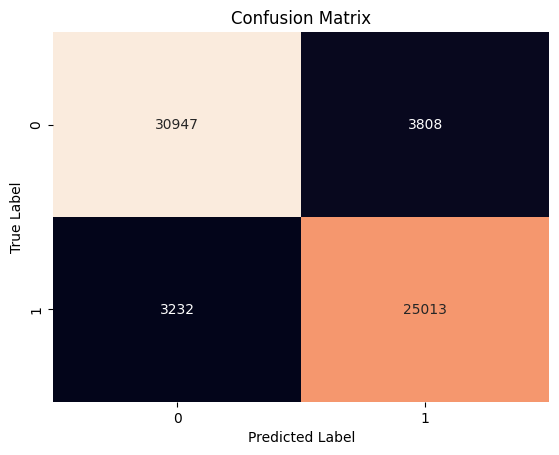

In [17]:
import seaborn as sns
cm = confusion_matrix(y_val, predict_)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

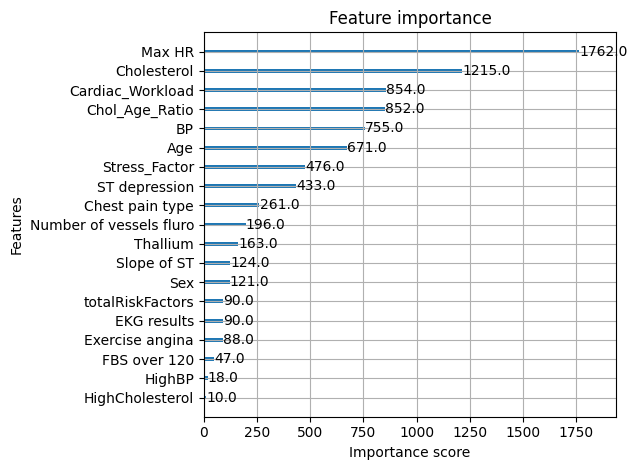

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import xgboost as xgb

#Feature importance (weight)
xgb.plot_importance(model, importance_type="weight")
plt.tight_layout()
plt.show()



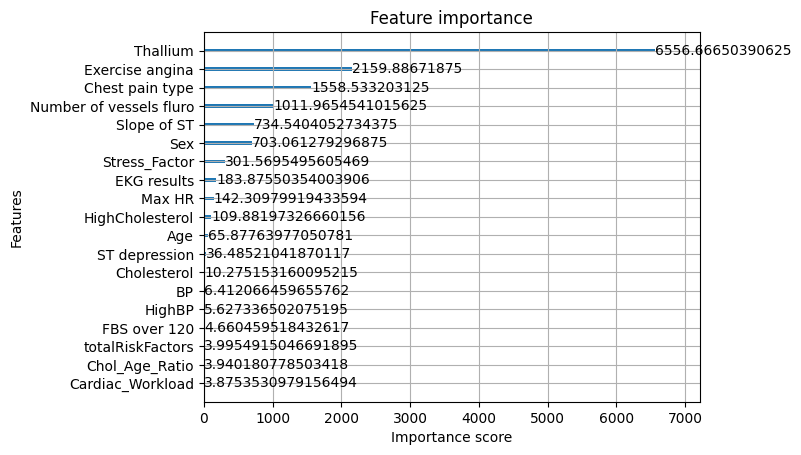

In [19]:
#Feature importance (gain)
xgb.plot_importance(model, importance_type='gain')
plt.show()

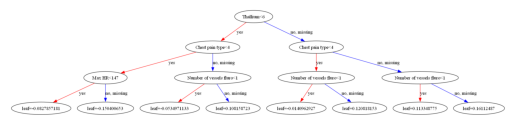

<Figure size 640x480 with 0 Axes>

In [20]:
xgb.plot_tree(model, num_trees=2)
plt.show()
#try saving it to see it better.
plt.savefig("Tree")

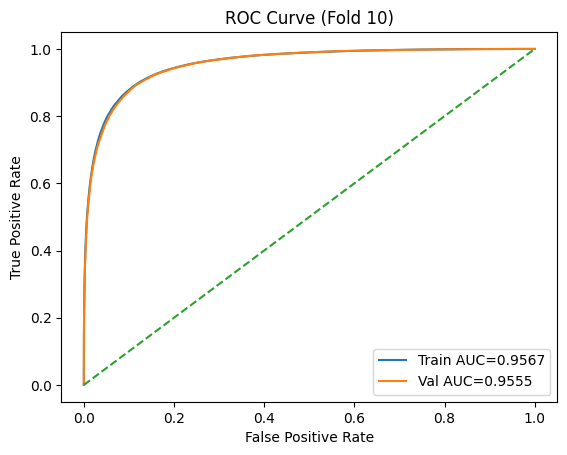

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# inside the loop, after fitting:
train_proba = model.predict_proba(X_train)[:, 1]
val_proba   = model.predict_proba(X_val)[:, 1]

fpr_tr, tpr_tr, _ = roc_curve(y_train, train_proba)
fpr_va, tpr_va, _ = roc_curve(y_val, val_proba)

auc_tr = roc_auc_score(y_train, train_proba)
auc_va = roc_auc_score(y_val, val_proba)

plt.figure()
plt.plot(fpr_tr, tpr_tr, label=f"Train AUC={auc_tr:.4f}")
plt.plot(fpr_va, tpr_va, label=f"Val AUC={auc_va:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (Fold {f})")
plt.legend()
plt.show()

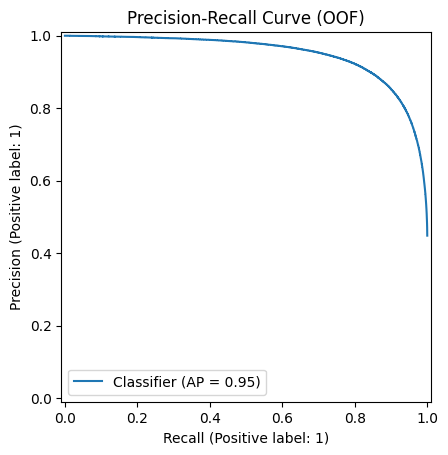

In [32]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y, oof_preds)
plt.title("Precision-Recall Curve (OOF)")
plt.show()

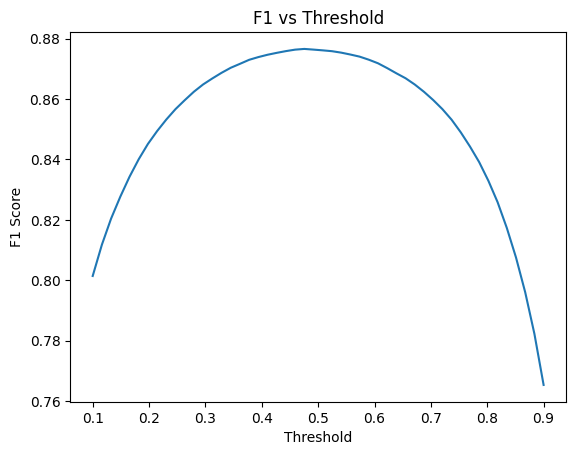

In [34]:
from sklearn.metrics import f1_score
thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = []

for t in thresholds:
    preds = (oof_preds >= t).astype(int)
    f1_scores.append(f1_score(y, preds))

plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 vs Threshold")
plt.show()

In [ ]:
test_preds /= cv.n_splits
submission = pd.DataFrame({"id": test_ids, "Heart Disease": test_preds})
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("Saved: submission.csv")